In [ ]:
import os
import numpy as np
from PIL import Image
import pandas as pd
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras.layers import Input, Activation, Add, Dense, Conv2D, GlobalAveragePooling2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Model
from keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras import backend
from tensorflow.keras.callbacks import ModelCheckpoint


In [ ]:
data_dir = '/kaggle/input/mtfset/mtf2000'
img_size = (224, 224)
images = []
labels = []
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith(".jpeg"):
            image = Image.open(os.path.join(root, file))
            image = image.resize(img_size)
            image=np.array(image)
            image=image/255.0
            images.append(image)
            label = root.split('/')[-1]
            labels.append(label)

images = np.array(images)
labels = np.array(labels)
print(len(images))
print(len(labels))
print(labels[0])
labels = pd.get_dummies(labels).values

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.15, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


633
633
anomaly


In [ ]:
print("la longeur des test",len(X_test))
print("la longeur des train",len(X_train))
print("la longeur des val",len(X_val))

la longeur des test 95
la longeur des train 430
la longeur des val 108


In [ ]:
base_model = tf.keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(img_size[0], img_size[1], 3)
)
base_model.trainable = True

x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu',kernel_regularizer=l2(1e-2))(x)
x = Dropout(0.7)(x)
predictions = Dense(2, activation='softmax',kernel_regularizer=l2(1e-2))(x)

model = Model(inputs=base_model.input, outputs=predictions)



In [ ]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 74,969,474 (285.99 MB)

 Trainable params: 74,916,354 (285.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/800
 2/27 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.3750 - loss: 12.3719 

W0000 00:00:1716224325.059968      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5871 - loss: 11.5599   

W0000 00:00:1716224357.023040      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


27/27 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.5906 - loss: 11.5489 - val_accuracy: 0.4907 - val_loss: 10.8457
Epoch 2/800
27/27 ━━━━━━━━━━━━━━━━━━━━ 23s 272ms/step - accuracy: 0.8727 - loss: 10.1853 - val_accuracy: 0.5093 - val_loss: 10.9948
Epoch 3/800
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9520 - loss: 9.8182 - val_accuracy: 0.5093 - val_loss: 12.4163
Epoch 4/800
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9727 - loss: 9.5976 - val_accuracy: 0.5093 - val_loss: 11.2610
Epoch 5/800
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9666 - loss: 9.5485 - val_accuracy: 0.5093 - val_loss: 10.2987
Epoch 6/800
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9835 - loss: 9.3467 - val_accuracy: 0.4907 - val_loss: 9.9840
Epoch 7/800
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9884 - loss: 9.1722 - val_accuracy: 0.4907 - val_loss: 14.0123
Epoch 8/800
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9923 - loss: 9.0490 - val_accuracy

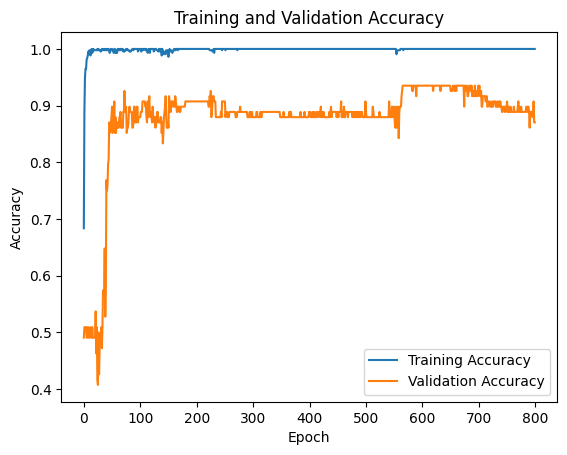

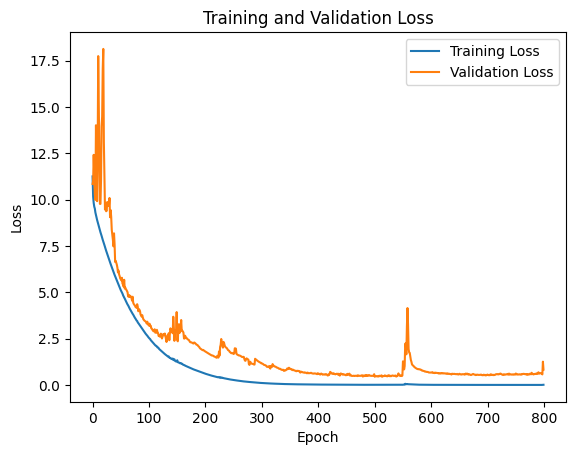

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00002), metrics=['accuracy'])
model_checkpoint = ModelCheckpoint('/kaggle/working/modelresnet50_mtf.keras', save_best_only=True, monitor='val_accuracy', mode='max')
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=800, batch_size=16, callbacks=[model_checkpoint])

# Tracer l'accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Tracer le loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9516 - loss: 0.3722 
Test loss: 0.34768643975257874
Test accuracy: 0.9578947424888611
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step


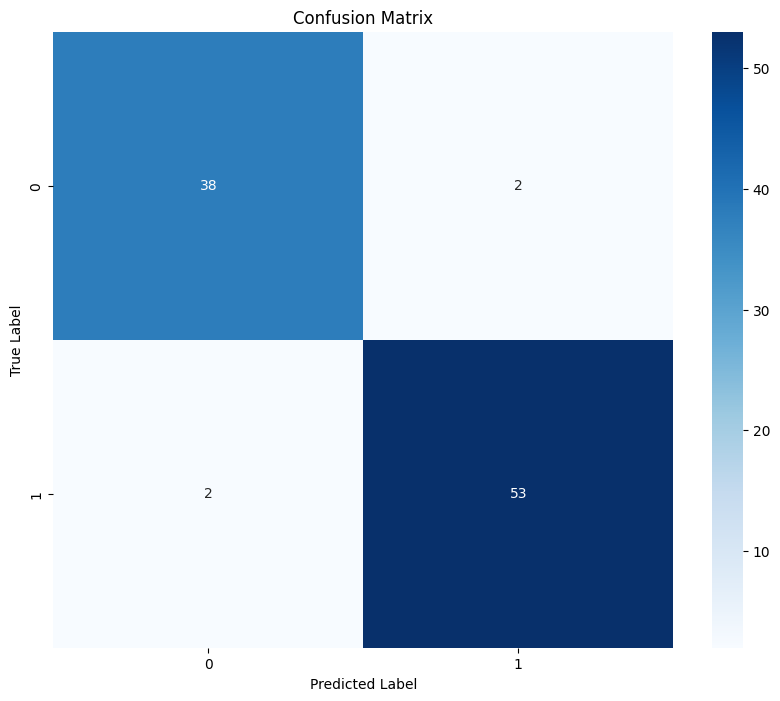

In [ ]:
model.load_weights('/kaggle/working/modelresnet50_mtf.keras')
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

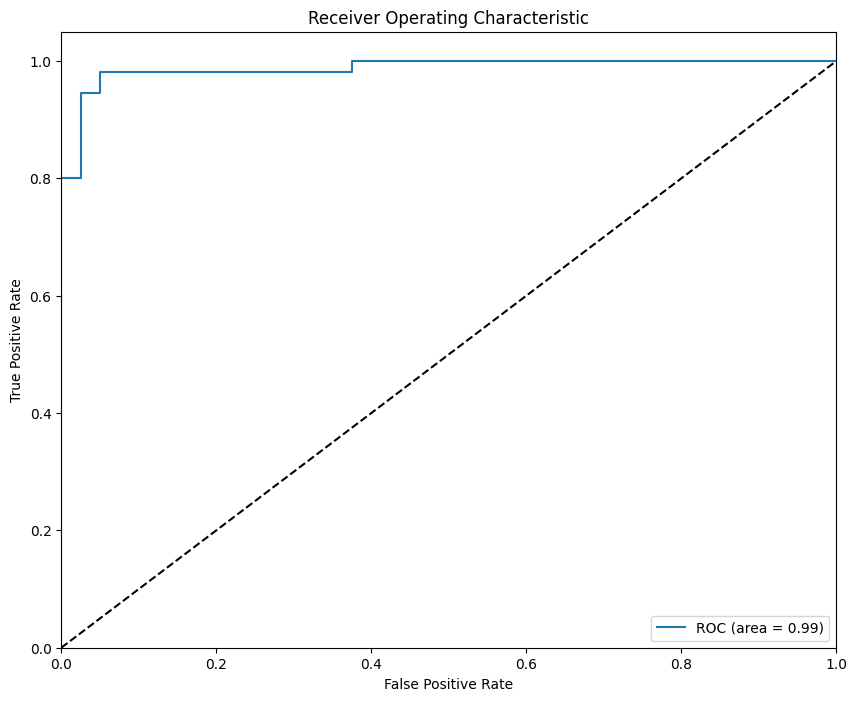

AUC equal: 0.9877272727272728


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true_classes, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print('AUC equal:', roc_auc)


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true_classes, y_pred_classes,digits=9)
print(report)


              precision    recall  f1-score   support

           0  0.950000000 0.950000000 0.950000000        40
           1  0.963636364 0.963636364 0.963636364        55

    accuracy                      0.957894737        95
   macro avg  0.956818182 0.956818182 0.956818182        95
weighted avg  0.957894737 0.957894737 0.957894737        95



# **visualiser les 3 courbes roc des 3 models**

In [ ]:
import os
import numpy as np
from PIL import Image
import pandas as pd
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras.layers import Input, Activation, Add, Dense, Conv2D, GlobalAveragePooling2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Model
from keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras import backend
from tensorflow.keras.callbacks import ModelCheckpoint


In [ ]:
import os
import numpy as np
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import load_model

def load_data(data_dir, img_size=(224, 224)):
    images = []
    labels = []
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".jpeg"):
                image = Image.open(os.path.join(root, file))
                image = image.resize(img_size)
                image = np.array(image)
                image = image / 255.0
                images.append(image)
                label = root.split('/')[-1]
                labels.append(label)

    images = np.array(images)
    labels = np.array(labels)
    labels = pd.get_dummies(labels).values
    return train_test_split(images, labels, test_size=0.15, random_state=42, stratify=labels)


data_dirs = {
    'GADF': '/kaggle/input/gadfdata/gadf2000',
    'GASF': '/kaggle/input/gafsset/gasf2000',
    'MTF': '/kaggle/input/mtfset/mtf2000'
}

data = {}
for key in data_dirs:
    data[key] = load_data(data_dirs[key])

(X_train_gadf, X_test_gadf, y_train_gadf, y_test_gadf) = data['GADF']
(X_train_gasf, X_test_gasf, y_train_gasf, y_test_gasf) = data['GASF']
(X_train_mtf, X_test_mtf, y_train_mtf, y_test_mtf) = data['MTF']


X_train_gadf, X_val_gadf, y_train_gadf, y_val_gadf = train_test_split(X_train_gadf, y_train_gadf, test_size=0.2, random_state=42)
X_train_gasf, X_val_gasf, y_train_gasf, y_val_gasf = train_test_split(X_train_gasf, y_train_gasf, test_size=0.2, random_state=42)
X_train_mtf, X_val_mtf, y_train_mtf, y_val_mtf = train_test_split(X_train_mtf, y_train_mtf, test_size=0.2, random_state=42)


In [ ]:
# Imprimer les tailles des bases de données
print("Tailles des bases de données initiales:")
print(f"GADF - Total images: {len(X_train_gadf) + len(X_val_gadf) + len(X_test_gadf)}")
print(f"GASF - Total images: {len(X_train_gasf) + len(X_val_gasf) + len(X_test_gasf)}")
print(f"MTF - Total images: {len(X_train_mtf) + len(X_val_mtf) + len(X_test_mtf)}")

# gadf
print("\nTailles des ensembles pour GADF:")
print(f"Entraînement: {len(X_train_gadf)}")
print(f"Validation: {len(X_val_gadf)}")
print(f"Test: {len(X_test_gadf)}")

# gasf
print("\nTailles des ensembles pour GASF:")
print(f"Entraînement: {len(X_train_gasf)}")
print(f"Validation: {len(X_val_gasf)}")
print(f"Test: {len(X_test_gasf)}")

# mtf
print("\nTailles des ensembles pour MTF:")
print(f"Entraînement: {len(X_train_mtf)}")
print(f"Validation: {len(X_val_mtf)}")
print(f"Test: {len(X_test_mtf)}")


Tailles des bases de données initiales:
GADF - Total images: 633
GASF - Total images: 633
MTF - Total images: 633

Tailles des ensembles pour GADF:
Entraînement: 430
Validation: 108
Test: 95

Tailles des ensembles pour GASF:
Entraînement: 430
Validation: 108
Test: 95

Tailles des ensembles pour MTF:
Entraînement: 430
Validation: 108
Test: 95


In [ ]:
# gadf model
base_model_gadf = tf.keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model_gadf.trainable = True

x = base_model_gadf.output
x = Flatten()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = Dropout(0.6)(x)
predictions_gadf = Dense(2, activation='softmax', kernel_regularizer=l2(1e-3))(x)

# Créer le modèle
model_gadf = Model(inputs=base_model_gadf.input, outputs=predictions_gadf)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# gasf model
base_model_gasf = tf.keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model_gasf.trainable = True

x = base_model_gasf.output
x = Flatten()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = Dropout(0.6)(x)
predictions_gasf = Dense(2, activation='softmax', kernel_regularizer=l2(1e-3))(x)

# Créer le modèle
model_gasf = Model(inputs=base_model_gasf.input, outputs=predictions_gasf)


In [ ]:
# mtf model
base_model_mtf = tf.keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224, 3)
)
base_model_mtf.trainable = True

x = base_model_mtf.output
x = Flatten()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(1e-2))(x)
x = Dropout(0.6)(x)
predictions_mtf = Dense(2, activation='softmax', kernel_regularizer=l2(1e-2))(x)

model_mtf = Model(inputs=base_model_mtf.input, outputs=predictions_mtf)


In [ ]:
model_gadf.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])
model_checkpoint_gadf = ModelCheckpoint('/kaggle/working/modelresnet50_gadf.keras', save_best_only=True, monitor='val_accuracy', mode='max',save_weights_only=False)
history_gadf = model_gadf.fit(X_train_gadf, y_train_gadf, validation_data=(X_val_gadf, y_val_gadf), epochs=600, batch_size=16, callbacks=[model_checkpoint_gadf])

# Tracer l'accuracy
plt.figure(figsize=(10, 6))
plt.plot([x * 100 for x in history_gadf.history['accuracy']], label='Training Accuracy')
plt.plot([x * 100 for x in history_gadf.history['val_accuracy']], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy for GADF')
plt.legend()
plt.show()

# Tracer le loss
plt.plot(history_gadf.history['loss'], label='Training Loss')
plt.plot(history_gadf.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for GADF')
plt.legend()
plt.show()


NameError: name 'model_gadf' is not defined

Epoch 1/600
 2/27 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.5156 - loss: 3.0788 

W0000 00:00:1716268324.342054      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 946ms/step - accuracy: 0.6540 - loss: 2.3024

W0000 00:00:1716268352.963944      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


27/27 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.6559 - loss: 2.2929 - val_accuracy: 0.5093 - val_loss: 1.9400
Epoch 2/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.8818 - loss: 1.3004 - val_accuracy: 0.5093 - val_loss: 2.6383
Epoch 3/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9094 - loss: 1.2255 - val_accuracy: 0.5093 - val_loss: 3.4105
Epoch 4/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9619 - loss: 1.0970 - val_accuracy: 0.5093 - val_loss: 6.0566
Epoch 5/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9837 - loss: 1.0580 - val_accuracy: 0.5093 - val_loss: 5.0116
Epoch 6/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9738 - loss: 1.0708 - val_accuracy: 0.5093 - val_loss: 8.3627
Epoch 7/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9824 - loss: 1.0408 - val_accuracy: 0.5093 - val_loss: 9.9806
Epoch 8/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9791 - loss: 1.0669 - val_accuracy: 0.5093 -

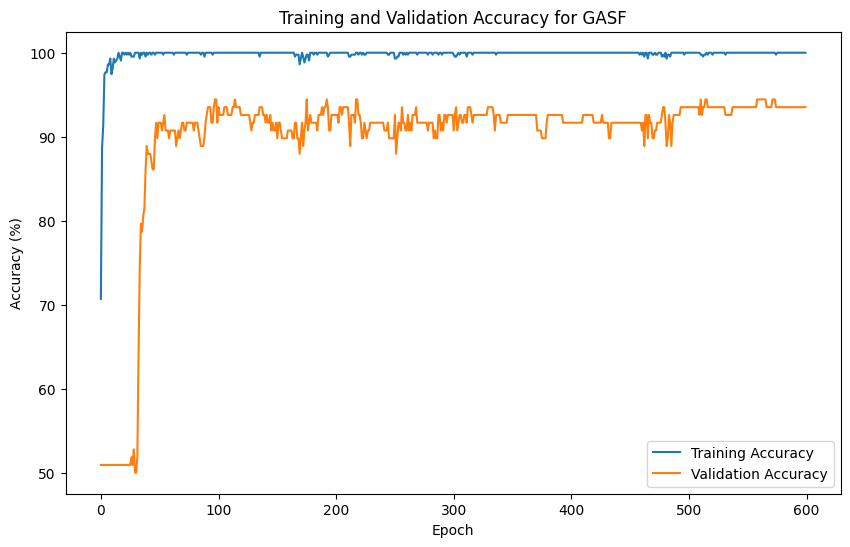

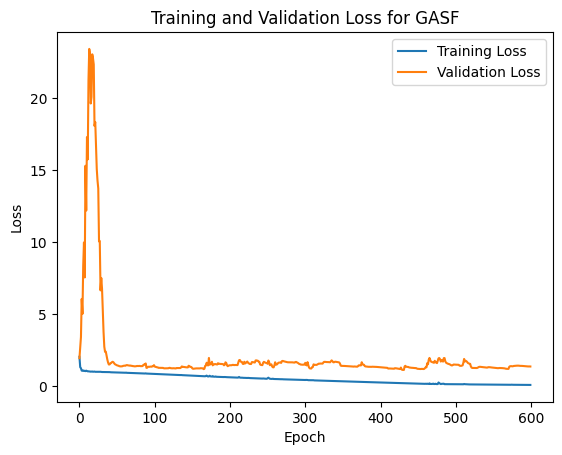

In [ ]:
# Compile the model
model_gasf.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])

# Define the model checkpoint
model_checkpoint_gasf = ModelCheckpoint('/kaggle/working/modelresnet50_gasf.keras', save_best_only=True, monitor='val_accuracy', mode='max',save_weights_only=False)

# Train the model
history_gasf = model_gasf.fit(X_train_gasf, y_train_gasf, validation_data=(X_val_gasf, y_val_gasf), epochs=600, batch_size=16, callbacks=[model_checkpoint_gasf])

# Tracer l'accuracy
plt.figure(figsize=(10, 6))
plt.plot([x * 100 for x in history_gasf.history['accuracy']], label='Training Accuracy')
plt.plot([x * 100 for x in history_gasf.history['val_accuracy']], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy for GASF')
plt.legend()
plt.show()

# Tracer le loss
plt.plot(history_gasf.history['loss'], label='Training Loss')
plt.plot(history_gasf.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for GASF')
plt.legend()
plt.show()


Epoch 1/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.6114 - loss: 1.8489 - val_accuracy: 0.5093 - val_loss: 1.1688
Epoch 2/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7943 - loss: 0.5392 - val_accuracy: 0.5093 - val_loss: 2.3262
Epoch 3/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.8791 - loss: 0.3410 - val_accuracy: 0.5093 - val_loss: 1.3651
Epoch 4/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9165 - loss: 0.2873 - val_accuracy: 0.5093 - val_loss: 0.8163
Epoch 5/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.9487 - loss: 0.2122 - val_accuracy: 0.5093 - val_loss: 1.6842
Epoch 6/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9636 - loss: 0.1762 - val_accuracy: 0.4907 - val_loss: 0.8491
Epoch 7/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9682 - loss: 0.1567 - val_accuracy: 0.4907 - val_loss: 1.5285
Epoch 8/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9753 - loss: 0.1475 - val_accuracy: 0.

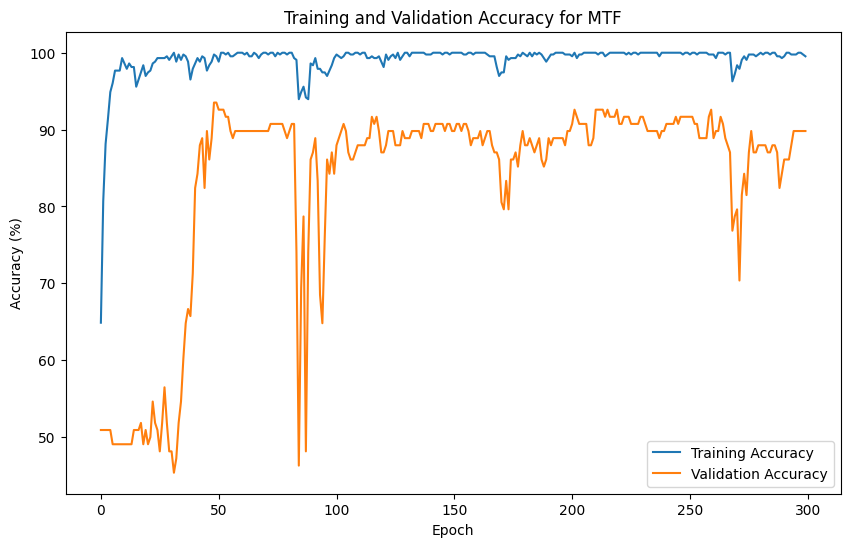

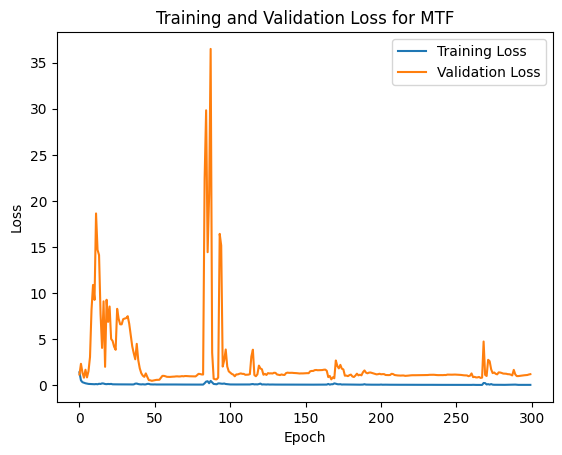

In [ ]:
# Compile the model
model_mtf.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Define the model checkpoint
model_checkpoint_mtf = ModelCheckpoint('/kaggle/working/modelresnet50_mtf.keras', save_best_only=True, monitor='val_accuracy', mode='max',save_weights_only=False)

# Train the model
history_mtf = model_mtf.fit(X_train_mtf, y_train_mtf, validation_data=(X_val_mtf, y_val_mtf), epochs=300, batch_size=16, callbacks=[model_checkpoint_mtf])

plt.figure(figsize=(10, 6))
plt.plot([x * 100 for x in history_mtf.history['accuracy']], label='Training Accuracy')
plt.plot([x * 100 for x in history_mtf.history['val_accuracy']], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy for MTF')
plt.legend()
plt.show()

# Tracer le loss
plt.plot(history_mtf.history['loss'], label='Training Loss')
plt.plot(history_mtf.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for MTF')
plt.legend()
plt.show()


In [ ]:
model_gadf = tf.keras.models.load_model('/kaggle/working/modelresnet50_gadf.keras')
model_gasf = tf.keras.models.load_model('/kaggle/working/modelresnet50_gasf.keras')
model_mtf = tf.keras.models.load_model('/kaggle/working/modelresnet50_mtf.keras')

ValueError: File not found: filepath=/kaggle/working/modelresnet50_gadf.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
model_mtf = tf.keras.models.load_model('/kaggle/working/modelresnet50_mtf.keras')

3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


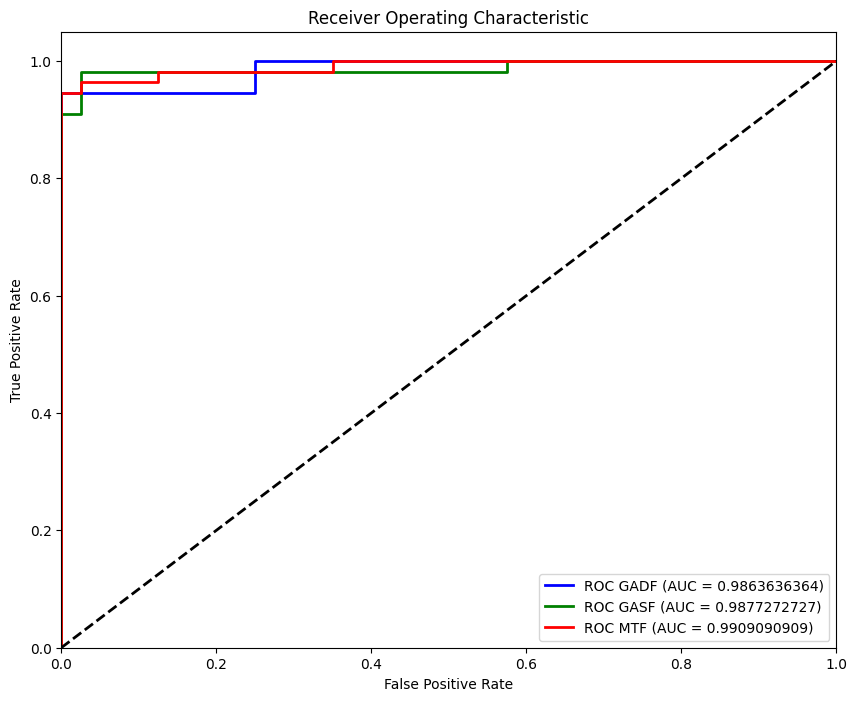

AUC GADF: 0.9863636363636363
AUC GASF: 0.9877272727272727
AUC MTF: 0.9909090909090909


In [ ]:
y_pred_gadf = model_gadf.predict(X_test_gadf)
y_pred_gasf = model_gasf.predict(X_test_gasf)
y_pred_mtf = model_mtf.predict(X_test_mtf)

# Calcul des courbes ROC et des valeurs AUC pour chaque modèle
fpr_gadf, tpr_gadf, _ = roc_curve(y_test_gadf.argmax(axis=1), y_pred_gadf[:, 1])
roc_auc_gadf = auc(fpr_gadf, tpr_gadf)

fpr_gasf, tpr_gasf, _ = roc_curve(y_test_gasf.argmax(axis=1), y_pred_gasf[:, 1])
roc_auc_gasf = auc(fpr_gasf, tpr_gasf)

fpr_mtf, tpr_mtf, _ = roc_curve(y_test_mtf.argmax(axis=1), y_pred_mtf[:, 1])
roc_auc_mtf = auc(fpr_mtf, tpr_mtf)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_gadf, tpr_gadf, color='blue', lw=2, label='ROC GADF (AUC = %0.10f)' % roc_auc_gadf)
plt.plot(fpr_gasf, tpr_gasf, color='green', lw=2, label='ROC GASF (AUC = %0.10f)' % roc_auc_gasf)
plt.plot(fpr_mtf, tpr_mtf, color='red', lw=2, label='ROC MTF (AUC = %0.10f)' % roc_auc_mtf)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('/kaggle/working/roc_curves.png')
plt.show()

# Imprimer les valeurs AUC
print('AUC GADF:', roc_auc_gadf)
print('AUC GASF:', roc_auc_gasf)
print('AUC MTF:', roc_auc_mtf)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


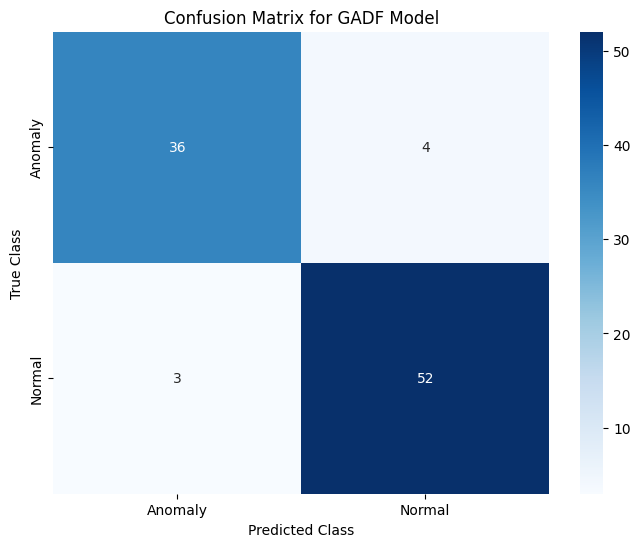

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_gadf = model_gadf.predict(X_test_gadf)


y_pred_classes_gadf = np.argmax(y_pred_gadf, axis=1)
y_true_classes_gadf = np.argmax(y_test_gadf, axis=1)

# Calcul de la matrice de confusion
conf_matrix_gadf = confusion_matrix(y_true_classes_gadf, y_pred_classes_gadf)

# Affichage de la matrice de confusion avec étiquettes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gadf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Anomaly', 'Normal'],
            yticklabels=['Anomaly', 'Normal'])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for GADF Model')
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


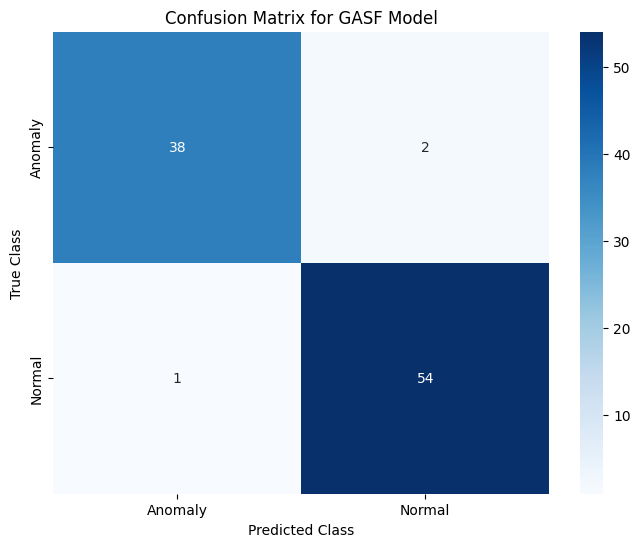

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_gasf = model_gasf.predict(X_test_gasf)

y_pred_classes_gasf = np.argmax(y_pred_gasf, axis=1)
y_true_classes_gasf = np.argmax(y_test_gasf, axis=1)

conf_matrix_gasf = confusion_matrix(y_true_classes_gasf, y_pred_classes_gasf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gasf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Anomaly', 'Normal'],
            yticklabels=['Anomaly', 'Normal'])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for GASF Model')


plt.savefig('/kaggle/working/confusion_matrix_gasf.png')
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


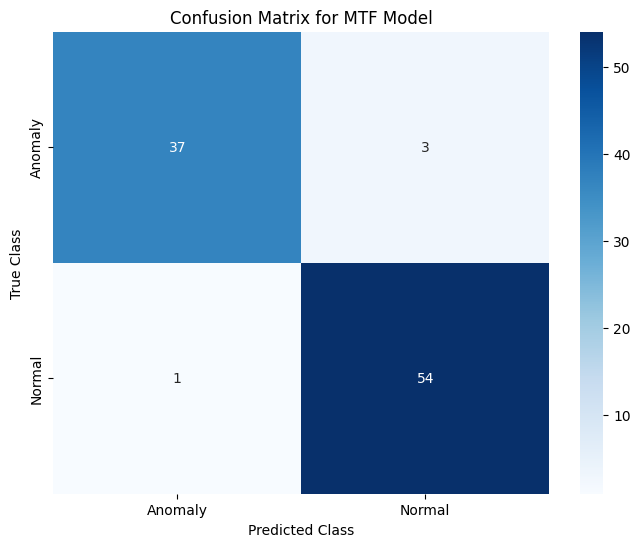

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_mtf = model_mtf.predict(X_test_mtf)
y_pred_classes_mtf = np.argmax(y_pred_mtf, axis=1)
y_true_classes_mtf = np.argmax(y_test_mtf, axis=1)
conf_matrix_mtf = confusion_matrix(y_true_classes_mtf, y_pred_classes_mtf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mtf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Anomaly', 'Normal'],
            yticklabels=['Anomaly', 'Normal'])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for MTF Model')
plt.savefig('/kaggle/working/confusion_matrix_mtf.png')
plt.show()

In [ ]:
test_loss, test_accuracy = model_mtf.evaluate(X_test_mtf, y_test_mtf)
print("MTF Accuracy")
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9594 - loss: 0.3758
MTF Accuracy
Test loss: 0.4251420795917511
Test accuracy: 0.9578947424888611


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true_classes_mtf, y_pred_classes_mtf)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Test Accuracy: 95.79%


In [ ]:
from sklearn.metrics import classification_report

# Prédictions sur l'ensemble de test
y_pred_gadf = model_gadf.predict(X_test_gadf)

# Conversion des prédictions en classes prédites
y_pred_classes_gadf = np.argmax(y_pred_gadf, axis=1)
y_true_classes_gadf = np.argmax(y_test_gadf, axis=1)

# Rapport de classification
class_report_gadf = classification_report(y_true_classes_gadf, y_pred_classes_gadf,digits=6)

# Affichage du rapport de classification
print("Rapport de classification pour le modèle GADF :")
print(class_report_gadf)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Rapport de classification pour le modèle GADF :
              precision    recall  f1-score   support

           0   0.923077  0.900000  0.911392        40
           1   0.928571  0.945455  0.936937        55

    accuracy                       0.926316        95
   macro avg   0.925824  0.922727  0.924165        95
weighted avg   0.926258  0.926316  0.926181        95



In [ ]:
# Prédictions sur l'ensemble de test
y_pred_gasf = model_gasf.predict(X_test_gasf)

# Conversion des prédictions en classes prédites
y_pred_classes_gasf = np.argmax(y_pred_gasf, axis=1)
y_true_classes_gasf = np.argmax(y_test_gasf, axis=1)

# Rapport de classification
class_report_gasf = classification_report(y_true_classes_gasf, y_pred_classes_gasf,digits=6)

# Affichage du rapport de classification
print("Rapport de classification pour le modèle GASF :")
print(class_report_gasf)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Rapport de classification pour le modèle GASF :
              precision    recall  f1-score   support

           0   0.974359  0.950000  0.962025        40
           1   0.964286  0.981818  0.972973        55

    accuracy                       0.968421        95
   macro avg   0.969322  0.965909  0.967499        95
weighted avg   0.968527  0.968421  0.968363        95



In [ ]:
# Prédictions sur l'ensemble de test
y_pred_mtf = model_mtf.predict(X_test_mtf)

# Conversion des prédictions en classes prédites
y_pred_classes_mtf = np.argmax(y_pred_mtf, axis=1)
y_true_classes_mtf = np.argmax(y_test_mtf, axis=1)

# Rapport de classification
class_report_mtf = classification_report(y_true_classes_mtf, y_pred_classes_mtf,digits=6)

# Affichage du rapport de classification
print("Rapport de classification pour le modèle MTF :")
print(class_report_mtf)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Rapport de classification pour le modèle MTF :
              precision    recall  f1-score   support

           0   0.974359  0.950000  0.962025        40
           1   0.964286  0.981818  0.972973        55

    accuracy                       0.968421        95
   macro avg   0.969322  0.965909  0.967499        95
weighted avg   0.968527  0.968421  0.968363        95



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matrice de confusion pour le modèle GADF
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gadf, annot=True, cmap='Blues', fmt='g')
plt.title('Matrice de confusion pour le modèle GADF')
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.savefig('/kaggle/working/confusion_matrix_gadf.png')
plt.close()

# Matrice de confusion pour le modèle GASF
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gasf, annot=True, cmap='Blues', fmt='g')
plt.title('Matrice de confusion pour le modèle GASF')
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.savefig('/kaggle/working/confusion_matrix_gasf.png')
plt.close()

# Matrice de confusion pour le modèle MTF
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mtf, annot=True, cmap='Blues', fmt='g')
plt.title('Matrice de confusion pour le modèle MTF')
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.savefig('/kaggle/working/confusion_matrix_mtf.png')
plt.close()


In [ ]:
# Enregistrement des rapports de classification dans des fichiers texte
with open('/kaggle/working/classification_report_gadf.txt', 'w') as file:
    file.write(class_report_gadf)

with open('/kaggle/working/classification_report_gasf.txt', 'w') as file:
    file.write(class_report_gasf)

with open('/kaggle/working/classification_report_mtf.txt', 'w') as file:
    file.write(class_report_mtf)


In [ ]:
with open('/kaggle/working/classification_report_mtf.txt', 'w') as file:
    file.write(class_report_mtf)

In [ ]:
# Enregistrer l'histoire d'entraînement pour le modèle GADF
plt.figure(figsize=(10, 6))
plt.plot([x * 100 for x in history_gadf.history['accuracy']], label='Training Accuracy')
plt.plot([x * 100 for x in history_gadf.history['val_accuracy']], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy for GADF')
plt.legend()
plt.savefig('/kaggle/working/training_accuracy_gadf.png')
plt.close()

plt.figure(figsize=(10, 6))
plt.plot(history_gadf.history['loss'], label='Training Loss')
plt.plot(history_gadf.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for GADF')
plt.legend()
plt.savefig('/kaggle/working/training_loss_gadf.png')
plt.close()

# Enregistrer l'histoire d'entraînement pour le modèle GASF
plt.figure(figsize=(10, 6))
plt.plot([x * 100 for x in history_gasf.history['accuracy']], label='Training Accuracy')
plt.plot([x * 100 for x in history_gasf.history['val_accuracy']], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy for GASF')
plt.legend()
plt.savefig('/kaggle/working/training_accuracy_gasf.png')
plt.close()

plt.figure(figsize=(10, 6))
plt.plot(history_gasf.history['loss'], label='Training Loss')
plt.plot(history_gasf.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for GASF')
plt.legend()
plt.savefig('/kaggle/working/training_loss_gasf.png')
plt.close()

# Enregistrer l'histoire d'entraînement pour le modèle MTF
plt.figure(figsize=(10, 6))
plt.plot([x * 100 for x in history_mtf.history['accuracy']], label='Training Accuracy')
plt.plot([x * 100 for x in history_mtf.history['val_accuracy']], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy for MTF')
plt.legend()
plt.savefig('/kaggle/working/training_accuracy_mtf.png')
plt.close()

plt.figure(figsize=(10, 6))
plt.plot(history_mtf.history['loss'], label='Training Loss')
plt.plot(history_mtf.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for MTF')
plt.legend()
plt.savefig('/kaggle/working/training_loss_mtf.png')
plt.close()
